In [ ]:
## What is the balance between Parties and Partisans with respect to positioning on subjects?
# How much do Partisans position Parties *where they are* vs Partisans positioning themselves *where they think the party is*?

# If a Party perceived position moves is it because people who like it have moved it?

In [ ]:
# Party Pos = Party Obj Pos + (Resp Obj Pos - Party Obj Pos)*LikeParty
# Or 
# Resp Pos = Resp Obj Pos + (Party Obj Pos - Resp Obj Pos)*LikeParty

# or some mix between the two

In [ ]:
## build a dataset of 


# wave, wt, immigSelf, immigCon, likeCon*, Self-Con gap


# * relativised version better?

In [ ]:
## isn't the easiest thing to do just to run xgboost on absolutely immigSelf?

In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

2024-02-05 22:40:26,617 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (10365, 13)
Wall time: 1min 56s


In [8]:
search(BES_reduced_with_na,"likeCon")

likeConW1__Strongly like     14804
likeConW2__Strongly like     14870
likeConW3__Strongly like     13355
likeConW4__Strongly like     15007
likeConW5__Strongly like     14891
likeConW6__Strongly like     14591
likeConW7__Strongly like     29506
likeConW8__Strongly like     32059
likeConW9__Strongly like     28771
likeConW10__Strongly like    27921
likeConW11__Strongly like    29109
likeConW12__Strongly like    32671
likeConW13__Strongly like    29803
likeConW14__Strongly like    29260
likeConW15__Strongly like    29137
likeConW16__Strongly like    35581
likeConW17__Strongly like    32124
likeConW18__Strongly like    35955
likeConW19__Strongly like    30939
likeConW20__Strongly like    29810
likeConW21__Strongly like    28660
likeConW22__Strongly like    26559
likeConW23__Strongly like    29570
likeConW24__Strongly like    14512
likeConW25__Strongly like    28790
dtype: int64

In [7]:
search(BES_Panel,"immigSelf")
# immigSelf 7,8,9,10,11,12*,13*,14,15,16,17, 20,21,22,23, 25
# immigCon  7,8,9,10,11,12*,13*,14,15,16,17, 20,21,22,23, 25
# likeCon -complete-

immigSelfW7     30895
immigSelfW8     33502
immigSelfW9     30036
immigSelfW10    30237
immigSelfW11    30956
immigSelfW12     8984
immigSelfW13     1289
immigSelfW14    31063
immigSelfW15    30842
immigSelfW16    37959
immigSelfW17    34366
immigSelfW20    31468
immigSelfW21    30281
immigSelfW22    28113
immigSelfW23    30949
immigSelfW25    30407
dtype: int64

In [10]:
wave_list = [ 7,8,9,10,
#              11,
#              12,
             14,15,16,17,  20,21,22,23, 25 ]
df = pd.DataFrame(columns = ["immig_self_source","immig_con_source","like_con_source",
                             "source_wave",
                             "destination_wave",
                             "source_weight",
                             "destination_weight"])

for pos in range(len(wave_list)):

#     temp_df = BES_reduced_with_na[["immigSelfW"+str(wave_list[pos])+"__Allow many more",
#                                    "immigSelfW"+str(wave_list[pos+1])+"__Allow many more"]]
    temp_df = BES_reduced_with_na[["immigSelfW"+str(wave_list[pos])+"__Allow many more",
                                   "immigConW"+str(wave_list[pos])+"__Allow many more",
                                   "likeConW"+str(wave_list[pos])+"__Strongly like"]]

    temp_df.columns = ["immig_self_source","immig_con_source","like_con_source"]
    temp_df["source_wave"] = wave_list[pos]
#     temp_df["destination_wave"] = wave_list[pos+1]
    temp_df["source_weight"] = BES_Panel["wt_new_W"+str(wave_list[pos])]
#     temp_df["destination_weight"] = BES_Panel["wt_new_W"+str(wave_list[pos+1])]
    temp_df = temp_df[temp_df.notnull().all(axis=1)]

    # should re-add/use DKs?
    df = df.append(temp_df)
    
    
    # drop wave 11 - no overlap!, wave 12 very little overlap
    
# df["diff"] = df["destination"] - df["source"]
df["immig_self_con_diff"] = df["immig_con_source"] - df["immig_self_source"]

<AxesSubplot:xlabel='immig_self_source', ylabel='immig_con_source'>

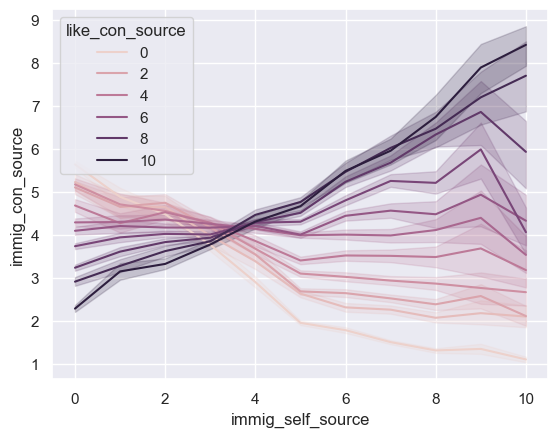

In [14]:
sns.lineplot(data=df,x="immig_self_source",y="immig_con_source",hue="like_con_source");

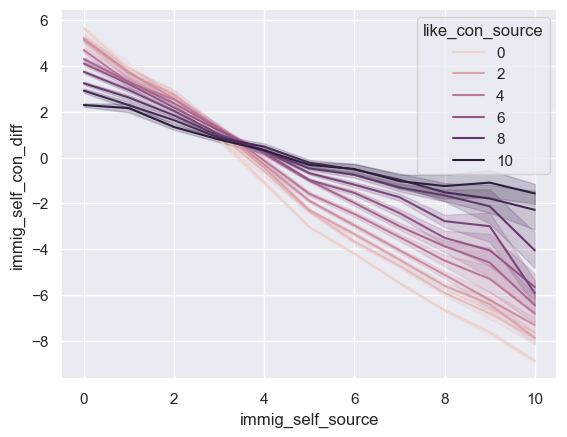

In [15]:
sns.lineplot(data=df,x="immig_self_source",y="immig_self_con_diff",hue="like_con_source");

,r,p,N
immigSelfW23__Allow many more,0.750000,0.00,5330
immigEconW25__Good for economy,0.720000,0.00,7843
asylumMoreW25__Many more,0.690000,0.00,1992
immigCulturalW20__Enriches cultural life,0.590000,0.00,3906
globalMigrationW20__Mainly good,0.570000,0.00,928
familiesMoreW25__Many more,0.560000,0.00,1984
studentsMoreW25__Many more,0.500000,0.00,1979
euMoreW20__Many more,0.490000,0.00,936
labHandleImmigW25__Very well,0.480000,0.00,7475
noneuMoreW25__Many more,0.480000,0.00,1989


MSE: 1.81, MAE: 0.97, EV: 0.72, R2: 0.72


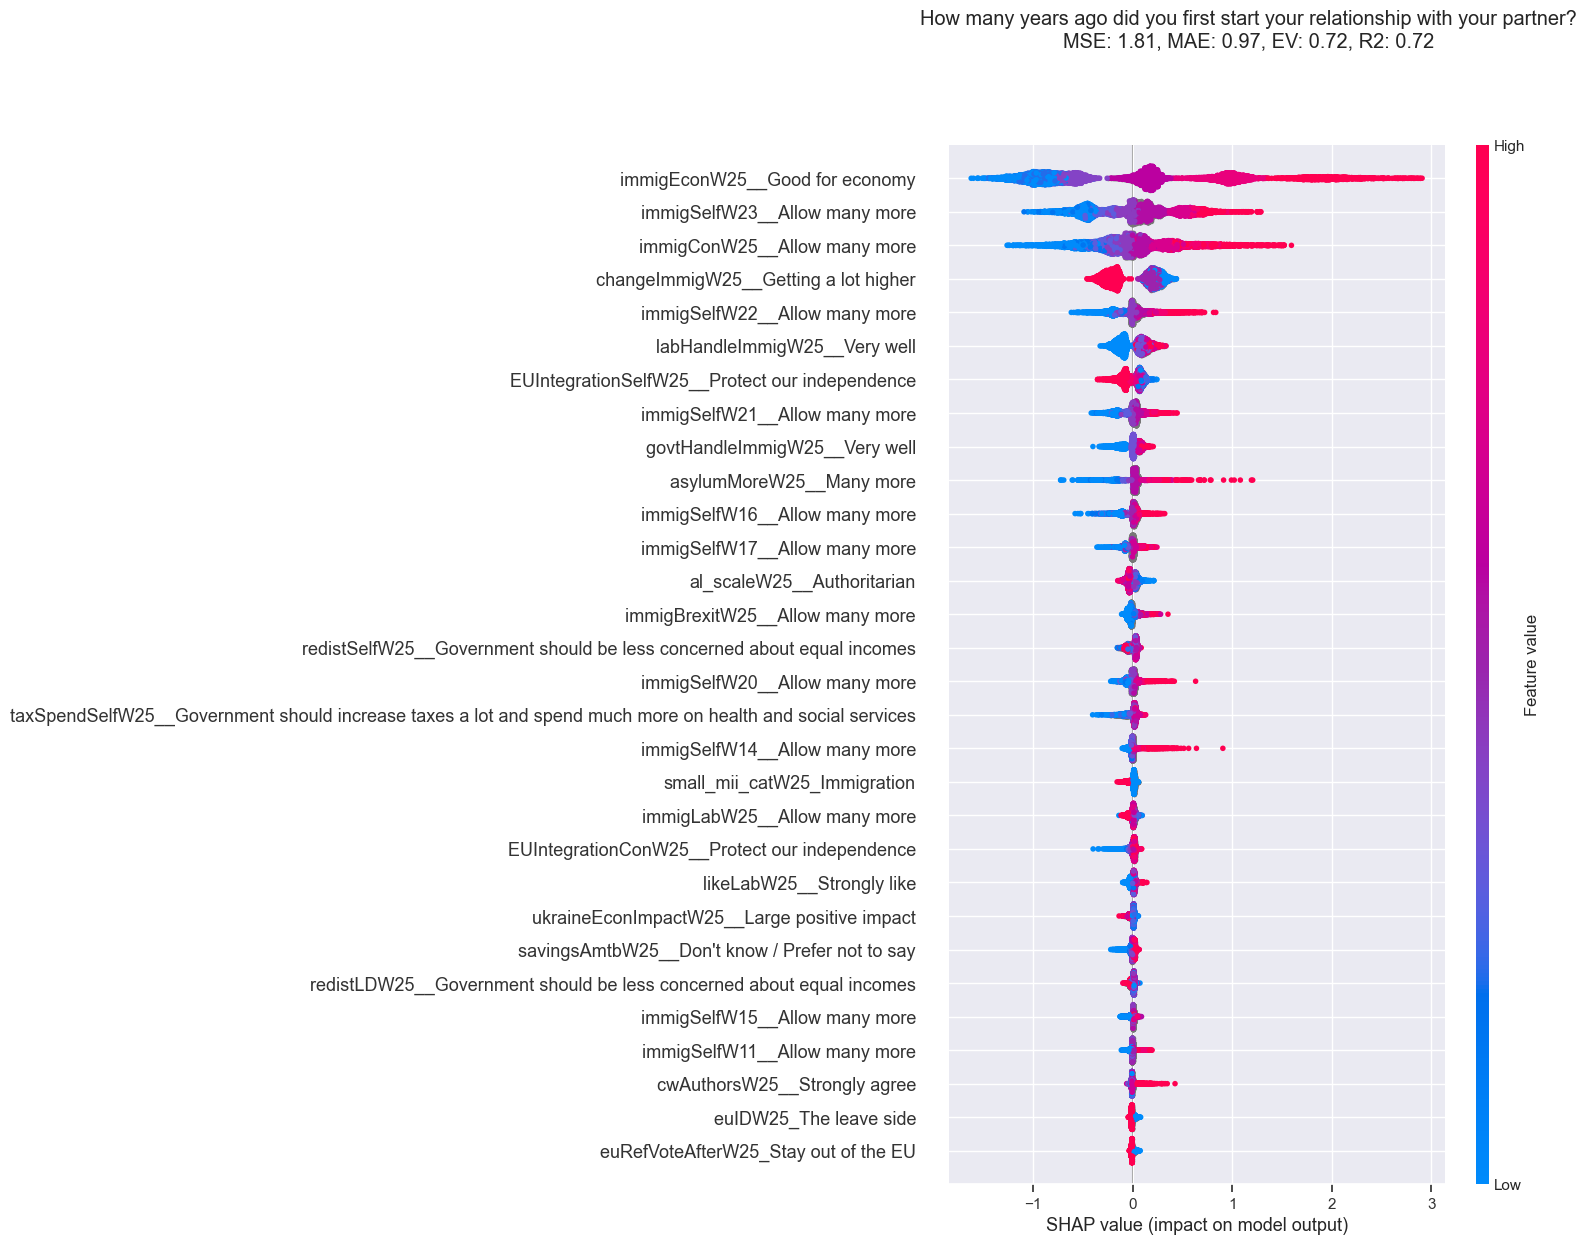

Wall time: 2min 7s


In [18]:
%%time
name="immigSelfW25__Allow many more"

mask = BES_reduced_with_na["likeConW25__Strongly like"]>5

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

,r,p,N
asylumMoreW25__Many more,0.840000,0.00,3799
immigSelfW23__Allow many more,0.830000,0.00,9575
immigEconW25__Good for economy,0.810000,0.00,15244
immigCulturalW20__Enriches cultural life,0.720000,0.00,6870
familiesMoreW25__Many more,0.710000,0.00,3816
euMoreW25__Many more,0.650000,0.00,3882
noneuMoreW20__Many more,0.630000,0.00,1681
studentsMoreW25__Many more,0.630000,0.00,3774
warmSyriansW11__Very warm,0.630000,0.00,1309
immigExpDVW2__Strongly agree,0.610000,0.00,2250


MSE: 1.98, MAE: 1.03, EV: 0.79, R2: 0.79


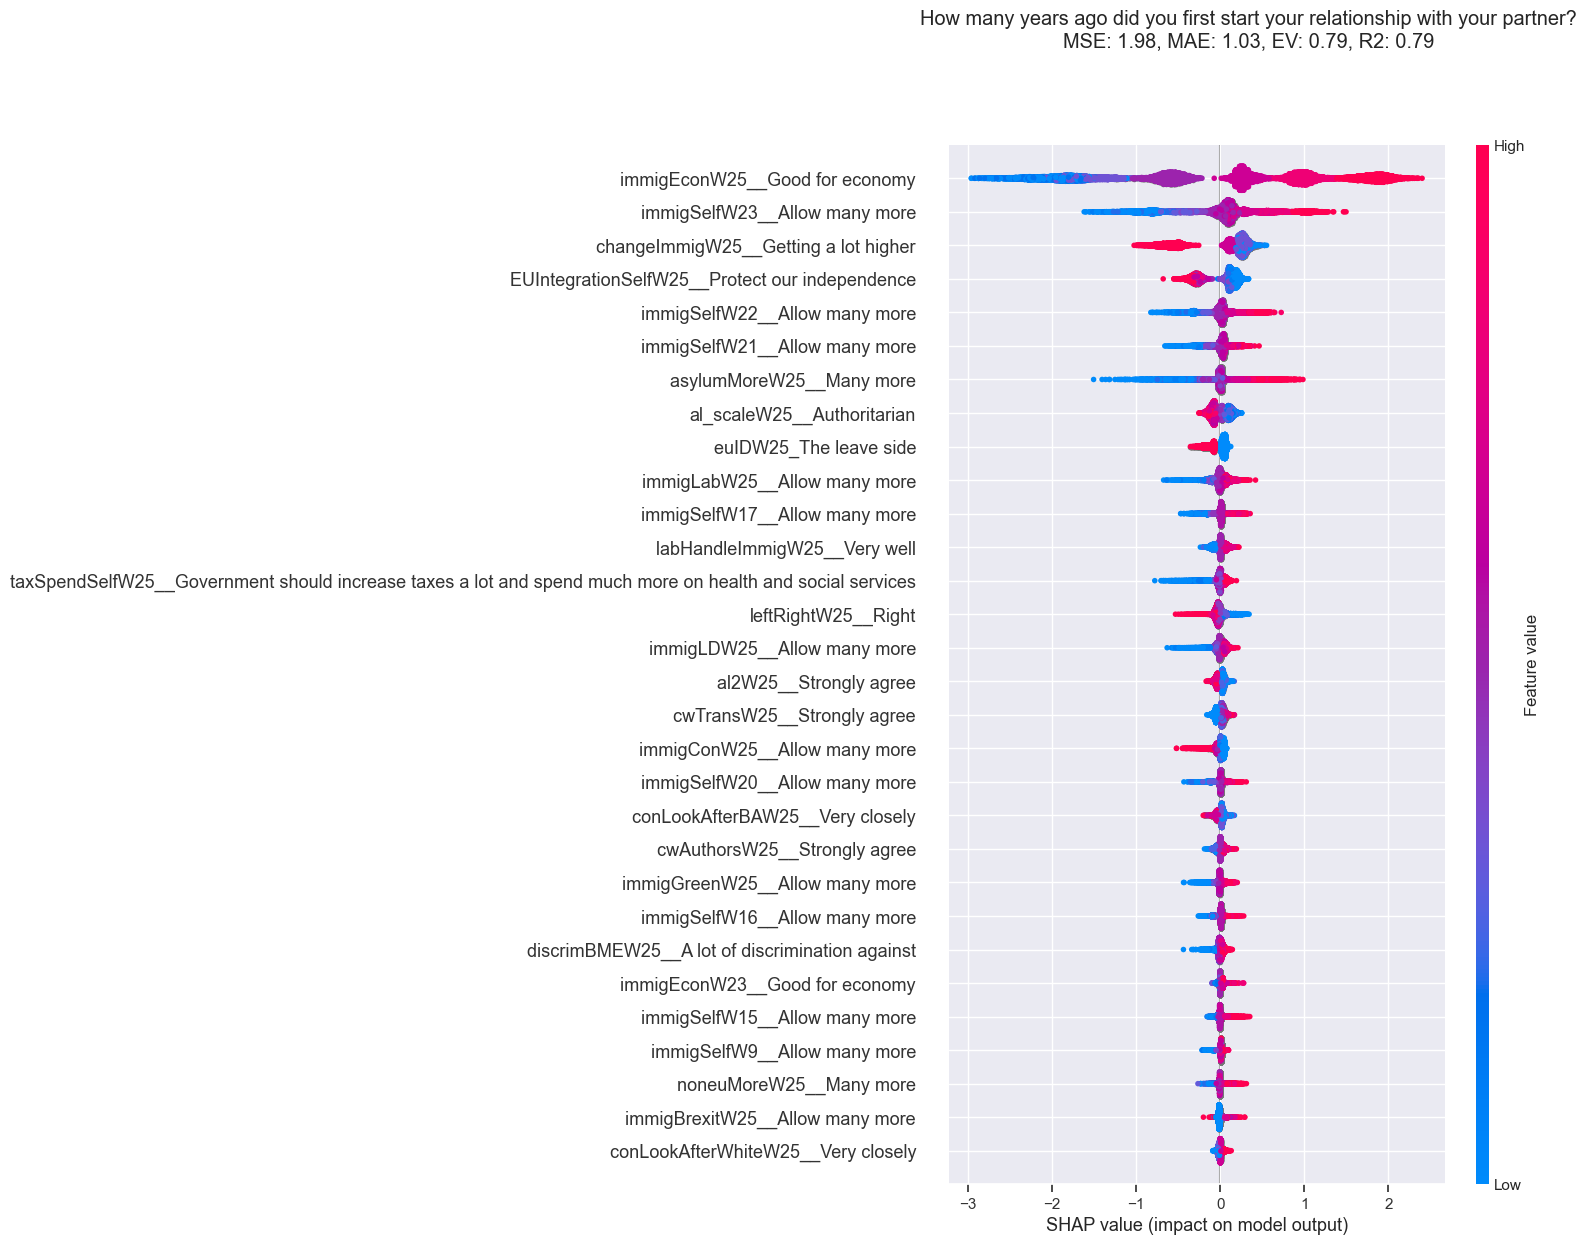

Wall time: 3min 11s


In [20]:
%%time
name="immigSelfW25__Allow many more"

mask = BES_reduced_with_na["likeConW25__Strongly like"]<5

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [ ]:
#### next up, look at *changes* in likeCon
# Eg. when people like Con Less/more is it immigSelf that shifts more or immigCon that shifts more?

In [46]:
## wave 7 to wave 25

likeConW7W25 = BES_reduced_with_na["likeConW25__Strongly like"]-BES_reduced_with_na["likeConW7__Strongly like"]
immigConW7W25 = BES_reduced_with_na["immigConW25__Allow many more"]-BES_reduced_with_na["immigConW7__Allow many more"]
immigSelfW7W25 = BES_reduced_with_na["immigSelfW25__Allow many more"]-BES_reduced_with_na["immigSelfW7__Allow many more"]
immigGapW7 = BES_reduced_with_na["immigConW7__Allow many more"] - BES_reduced_with_na["immigSelfW7__Allow many more"]
immigGapW25 = BES_reduced_with_na["immigConW25__Allow many more"] - BES_reduced_with_na["immigSelfW25__Allow many more"]
immigGapW7W25 = immigGapW25-immigGapW7

In [36]:
likeConW7W25.value_counts().sort_index()

-10.0     60
-9.0      94
-8.0     224
-7.0     309
-6.0     260
-5.0     353
-4.0     302
-3.0     412
-2.0     423
-1.0     480
 0.0     961
 1.0     446
 2.0     421
 3.0     334
 4.0     273
 5.0     353
 6.0     293
 7.0     252
 8.0     181
 9.0      61
 10.0     73
dtype: int64

In [37]:
likeConW7W25.mean()
# not as large a slump as you might think!
# note a slight age bias from comparing 2016 with 2023

-0.16755521706016754

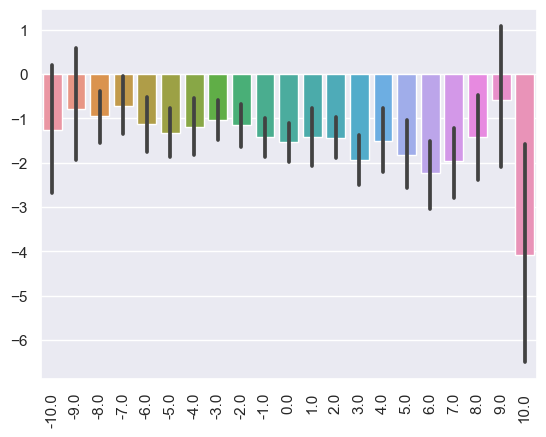

In [42]:
sns.barplot(x=likeConW7W25,y=immigConW7W25);
plt.xticks(rotation=90);

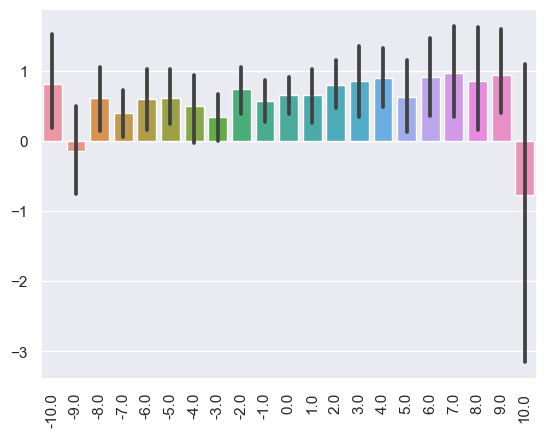

In [43]:
sns.barplot(x=likeConW7W25,y=immigSelfW7W25);
plt.xticks(rotation=90);

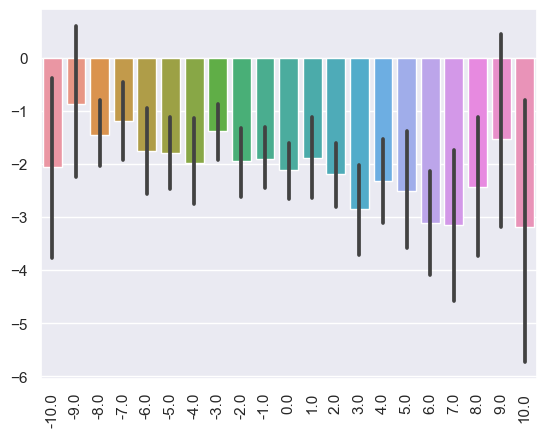

In [47]:
sns.barplot(x=likeConW7W25,y=immigGapW7W25);
plt.xticks(rotation=90);

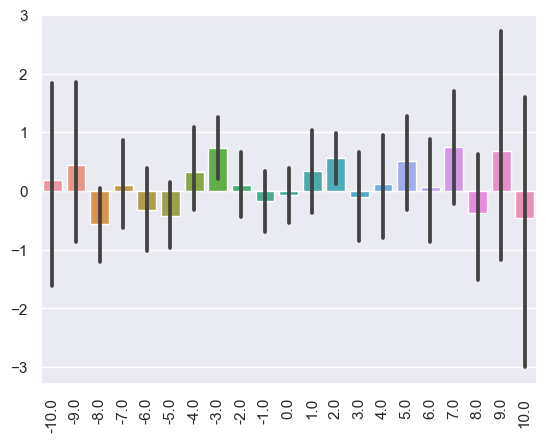

In [50]:
sns.barplot(x=likeConW7W25,y=(immigGapW25.abs())-(immigGapW7.abs()));
plt.xticks(rotation=90);

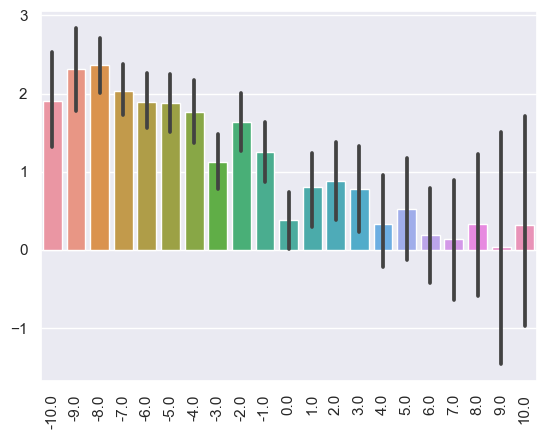

In [48]:
sns.barplot(x=likeConW7W25,y=immigGapW7);
plt.xticks(rotation=90);

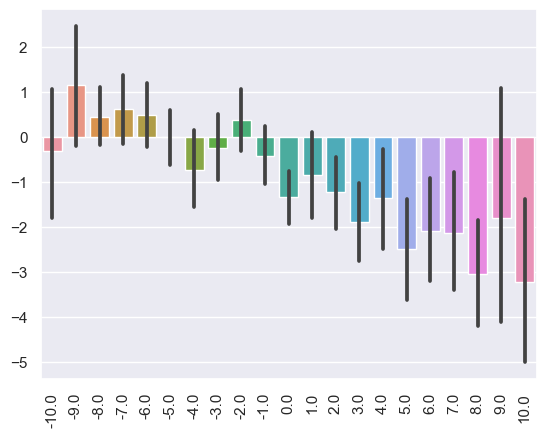

In [49]:
sns.barplot(x=likeConW7W25,y=immigGapW25);
plt.xticks(rotation=90);

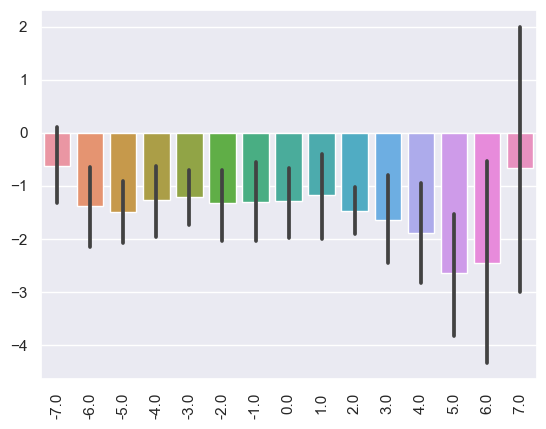

In [59]:
mask = (BES_reduced_with_na["likeConW7__Strongly like"]>=3)&(BES_reduced_with_na["likeConW7__Strongly like"]<=7)

sns.barplot(x=likeConW7W25[mask],y=immigConW7W25[mask]);
plt.xticks(rotation=90);

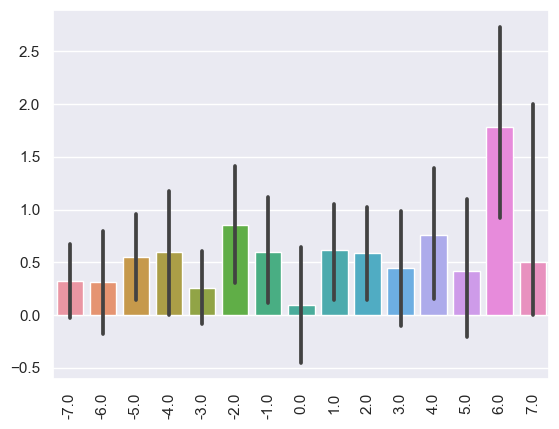

In [60]:
mask = (BES_reduced_with_na["likeConW7__Strongly like"]>=3)&(BES_reduced_with_na["likeConW7__Strongly like"]<=7)

sns.barplot(x=likeConW7W25[mask],y=immigSelfW7W25[mask]);
plt.xticks(rotation=90);

In [56]:
BES_reduced_with_na["likeConW7__Strongly like"].value_counts().sort_index()

0.0     9074
1.0     1905
2.0     2118
3.0     2077
4.0     1702
5.0     2740
6.0     2240
7.0     3159
8.0     2445
9.0      993
10.0    1053
Name: likeConW7__Strongly like, dtype: int64

In [ ]:
## this is just confusing!

In [ ]:
## Other approaches

# (1) Try BNlearn on immigSelf, immigCon, likeCon to infer causal structure!

# (2) Try predicting immigSel/immigCon/likeCon from other variables and see if the residuals look like a function of those vars

